In [1]:
import megatron as me
from scipy.sparse import load_npz

/Users/huidong/anaconda3/envs/env_megatron/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
me.__version__

'0.1a'

In [3]:
workdir = 'result_celltagging_clones'
me.settings.set_workdir(workdir)

Saving results in: result_celltagging_clones


In [4]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [5]:
adata = me.read_h5ad('rnaseq_biddy18.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 10887 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'CellTag.D0', 'CellTag.D3', 'CellTag.D13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    obsm: 'X_tsne_paper'

In [11]:
mat_clones = load_npz('clones_biddy18.npz')
mat_clones

<10887x540 sparse matrix of type '<class 'numpy.int64'>'
	with 10887 stored elements in Compressed Sparse Row format>

In [12]:
me.pp.add_clones(adata, 
                 mat=mat_clones)

In [13]:
adata

AnnData object with n_obs × n_vars = 10887 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'CellTag.D0', 'CellTag.D3', 'CellTag.D13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

In [19]:
me.pp.filter_cells_rna(adata,min_n_genes=100)
me.pp.filter_genes(adata,min_n_cells=5)

before filtering: 
10887 cells,  28001 genes
filter cells based on min_n_genes
after filtering out low-quality cells: 
10887 cells,  28001 genes
Before filtering: 
10887 cells, 28001 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
10887 cells, 15975 genes


In [20]:
me.pp.cal_qc_rna(adata)

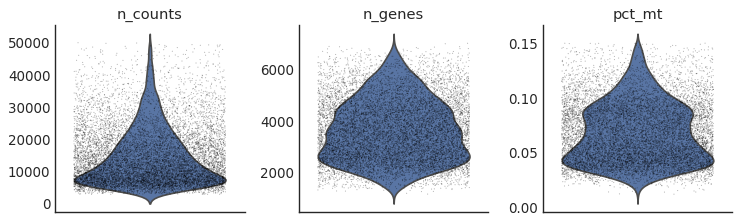

In [21]:
me.pl.violin(adata,list_obs=['n_counts','n_genes','pct_mt'],alpha=0.3)

In [22]:
me.pp.normalize(adata,method='lib_size')
me.pp.log_transform(adata)

In [23]:
me.pp.select_variable_genes(adata)

2000 variable genes are selected.


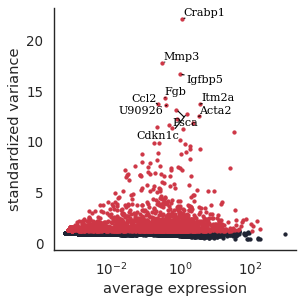

In [24]:
me.pl.variable_genes(adata,show_texts=True)

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_megatron/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


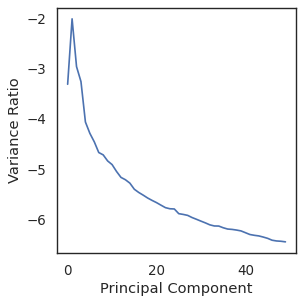

In [25]:
me.pp.pca(adata,feature='highly_variable',n_components=50)
me.pl.pca_variance_ratio(adata,show_cutoff=False)

the number of selected PC is: 50


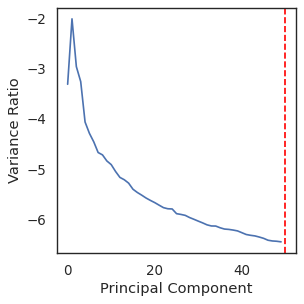

In [26]:
me.pp.select_pcs(adata, n_pcs=50)
me.pl.pca_variance_ratio(adata)

In [27]:
# me.tl.umap(adata,obsm='X_pca',n_dim=50)

In [28]:
adata.obsm['X_tsne'] = adata.obs[['tSNE_1', 'tSNE_2']].values
adata.obsm['X_umap'] = adata.obsm['X_tsne'].copy()

In [29]:
adata

AnnData object with n_obs × n_vars = 10887 × 15975
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'CellTag.D0', 'CellTag.D3', 'CellTag.D13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'symbol', 'id', 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca'
    obsm: 'X_clone', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'raw'

In [30]:
adata.obs['Cluster.Seurat'] = adata.obs['Cluster.Seurat'].astype(str)

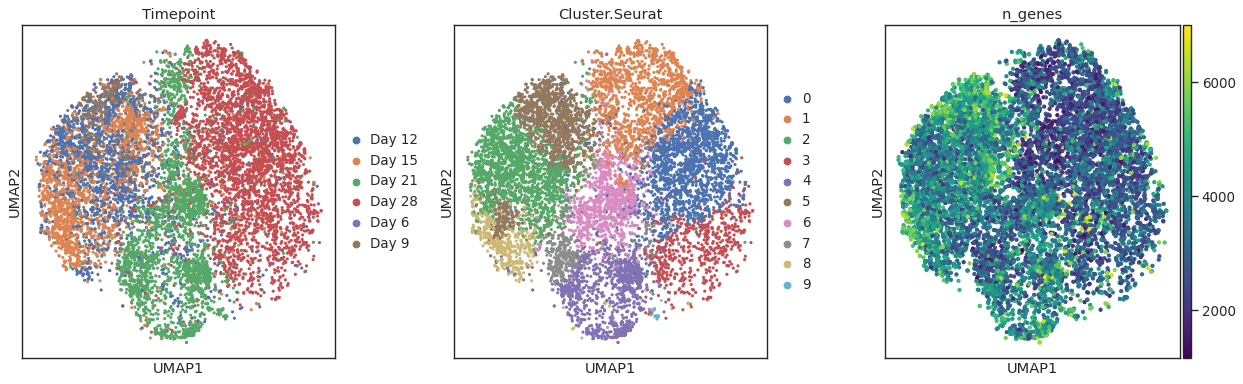

In [31]:
me.pl.umap(adata,color=['Timepoint','Cluster.Seurat','n_genes'],drawing_order='random')

In [32]:
me.pp.filter_clones(adata,min_cells=1)

Before filtering: 540 clones
After filtering: 540 clones


In [33]:
adata

AnnData object with n_obs × n_vars = 10887 × 15975
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'CellTag.D0', 'CellTag.D3', 'CellTag.D13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'symbol', 'id', 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca', 'color'
    obsm: 'X_clone', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'raw'

In [34]:
np.unique(adata.obs['Day'])

array([ 6,  9, 12, 15, 21, 28])

In [35]:
me.tl.clone_distance(adata,
                     method='directed_graph',
                     obsm='X_umap',
                     layer=None,
                     anno_time='Day')

Estimated radius is 11.4542874683492
Finished: 35.34219225645065 mins


In [41]:
me.tl.cluster_clones(adata,
                     n_clusters=4,
                     method='hierarchical')

In [42]:
adata.uns['clone']['anno']

,hierarchical
0,4
1,3
2,1
3,4
4,2
...,...
535,2
536,4
537,4
538,4


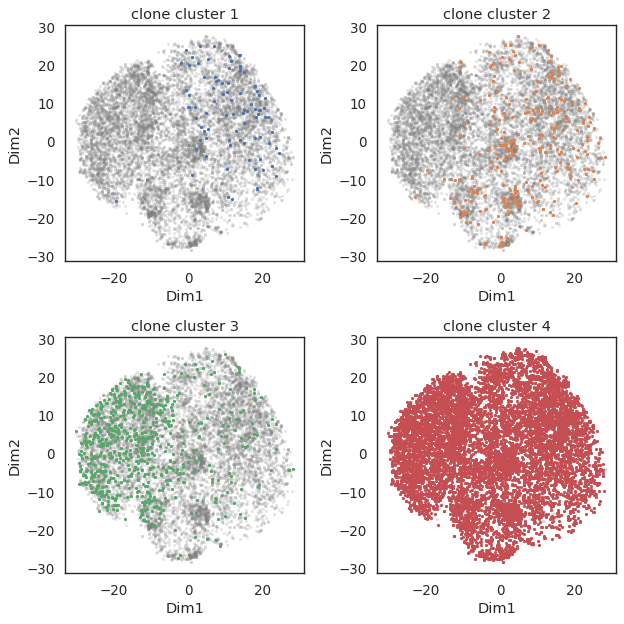

In [46]:
me.pl.clone_scatter(adata, group='hierarchical', obsm='X_tsne',show_contour=False, 
                    levels=6, thresh=0.1, alpha=1,fig_ncol=2)

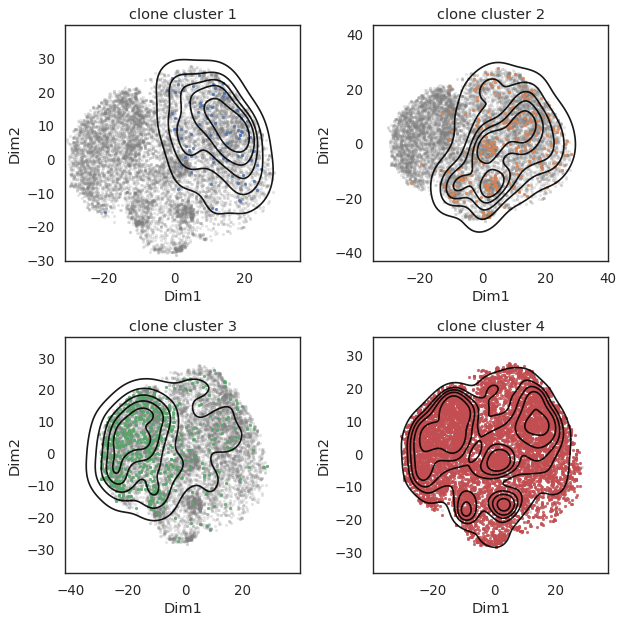

In [47]:
me.pl.clone_scatter(adata, group='hierarchical', obsm='X_tsne',show_contour=True, 
                    levels=6, thresh=0.1,fig_ncol=2)

In [48]:
adata.write('./result_celltagging_clones/adata.h5ad')

... storing 'Cluster.Seurat' as categorical
